# US Census Bureau Data Clean

In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import re 

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

## Step 1: Clean the ACS data which is by year, for 2011 - 2020

Specify your file path

In [161]:
path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/population/ACS/census_bureau_raw'
os.chdir(path)
# data_files = [i for i in os.listdir(path) if re.search('Data.csv', i)]
data_files = [f'ACSST5Y{i}.S0101-Data.csv' for i in range(2011, 2021)]
data_files

['ACSST5Y2011.S0101-Data.csv',
 'ACSST5Y2012.S0101-Data.csv',
 'ACSST5Y2013.S0101-Data.csv',
 'ACSST5Y2014.S0101-Data.csv',
 'ACSST5Y2015.S0101-Data.csv',
 'ACSST5Y2016.S0101-Data.csv',
 'ACSST5Y2017.S0101-Data.csv',
 'ACSST5Y2018.S0101-Data.csv',
 'ACSST5Y2019.S0101-Data.csv',
 'ACSST5Y2020.S0101-Data.csv']

### Function to clean census data
- Starting 2017, there are many more fields and exising fields change names.
- 2017 and beyond, there is actually a <18 age count field, but because the older tables dont have this, I'm leaving it out. 

In [162]:
def read_and_clean(csv_file):
  df = pd.read_csv(csv_file)
  
  # remove first row which contains field names
  df = df.iloc[1:]

  # add data year in cleaner format
  df['year'] = int(csv_file[7:11])

  # give fields intuitive names
  # starting 2017, the field names change a little
  if int(csv_file[7:11]) <= 2016:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population'
      ,'S0101_C02_001E': 'total_population_male'
      ,'S0101_C03_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C02_002E': 'population_0_4_male'
      ,'S0101_C03_002E': 'population_0_4_female'

      ,'S0101_C01_003E': 'population_5_9'
      ,'S0101_C02_003E': 'population_5_9_male'
      ,'S0101_C03_003E': 'population_5_9_female'

      ,'S0101_C01_004E': 'population_10_14'
      ,'S0101_C02_004E': 'population_10_14_male'
      ,'S0101_C03_004E': 'population_10_14_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C02_005E': 'population_15_19_male'
      ,'S0101_C03_005E': 'population_15_19_female'
      })
  else:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population'
      ,'S0101_C03_001E': 'total_population_male'
      ,'S0101_C05_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C03_002E': 'population_0_4_male'
      ,'S0101_C05_002E': 'population_0_4_female'

      ,'S0101_C01_003E': 'population_5_9'
      ,'S0101_C03_003E': 'population_5_9_male'
      ,'S0101_C05_003E': 'population_5_9_female'

      ,'S0101_C01_004E': 'population_10_14'
      ,'S0101_C03_004E': 'population_10_14_male'
      ,'S0101_C05_004E': 'population_10_14_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C03_005E': 'population_15_19_male'
      ,'S0101_C05_005E': 'population_15_19_female'
      })

  # select just the fields we need
  df = df[['year', 'zip', 
    'total_population', 'total_population_male', 'total_population_female', 
    'population_0_4', 'population_0_4_male', 'population_0_4_female',
    'population_5_9', 'population_5_9_male', 'population_5_9_female',
    'population_10_14', 'population_10_14_male', 'population_10_14_female',
    'population_15_19', 'population_15_19_male', 'population_15_19_female'
    ]]

  # extract 5-digit zip
  df['zip'] = df['zip'].map(lambda x: int(x[6:]))

  # some columns put "-" instead of 0
  for col in df.columns[2:]:
    df[col] = df[col].map(lambda x: re.sub('-', '0', str(x)))

  # convert measurement columns to float 
  df = df.astype({i:'float' for i in df.columns[2:]})

  # 2016 and prior, the population age band estimates are actually percentages, 
  # so convert them to absolute totals
  if int(csv_file[7:11]) <= 2016:
    for col in [i for i in df.columns if re.search('_male', i)][1:]:
      df[col] = df[col] * df['total_population_male'] / 100 

    for col in [i for i in df.columns if re.search('_female', i)][1:]:
      df[col] = df[col] * df['total_population_female'] / 100 
    
    for col in ['population_0_4', 'population_5_9', 'population_10_14', 'population_15_19']:
      df[col] = df[col] * df['total_population'] / 100

  
  return df

### Run function on all files, and concatenate results

In [163]:
df = pd.concat([read_and_clean(i) for i in data_files], ignore_index=True)
df

<ipython-input-163-1adf43944119>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,610,611,612,613,614,615,616,617,618,619,620,621,622,623

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female
0,2011,89010,313.0,174.0,139.0,0.000,0.000,0.000,13.146,6.960,5.977,14.085,6.960,6.950,32.865,16.008,16.958
1,2011,89019,2172.0,1324.0,848.0,158.556,51.636,106.848,0.000,0.000,0.000,117.288,90.032,27.984,69.504,11.916,56.816
2,2011,89060,10691.0,5342.0,5349.0,438.331,277.784,160.470,395.567,176.286,219.309,791.134,459.412,326.289,620.078,309.836,310.242
3,2011,89061,4658.0,2490.0,2168.0,149.056,97.110,54.200,279.480,146.910,132.248,377.298,271.410,104.064,344.692,166.830,175.608
4,2011,89439,1457.0,797.0,660.0,30.597,0.000,31.020,0.000,0.000,0.000,62.651,31.083,31.020,32.054,31.880,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,2020,96148,679.0,349.0,330.0,20.000,20.000,0.000,36.000,12.000,24.000,35.000,11.000,24.000,0.000,0.000,0.000
17686,2020,96150,30369.0,15865.0,14504.0,1362.000,672.000,690.000,1172.000,472.000,700.000,1364.000,738.000,626.000,1621.000,871.000,750.000
17687,2020,96155,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17688,2020,96161,18782.0,9504.0,9278.0,1045.000,458.000,587.000,1188.000,617.000,571.000,1315.000,661.000,654.000,788.000,298.000,490.000


Total CA population looks accurate

In [164]:
df.groupby('year')['total_population'].sum()

year
2011    36980684.0
2012    37335403.0
2013    37669283.0
2014    38076883.0
2015    38432707.0
2016    38664587.0
2017    38992917.0
2018    39159540.0
2019    39295030.0
2020    39358277.0
Name: total_population, dtype: float64

In [165]:
df['total_pop_under19'] = df\
  .apply(lambda df: df['population_0_4'] + df['population_5_9'] + df['population_10_14'] + df['population_15_19'], axis=1)

In [166]:
agg_dict = {i:(i, 'sum') for i in df.columns[2:len(df.columns)-1]}
# agg_dict['n']= ('year', 'count')
df_grouped = df.groupby('year').agg(**agg_dict).reset_index()
df_grouped

,year,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female
0,2011,36980684.0,18390778.0,18589906.0,2545268.259,1301589.142,1243889.735,2489090.013,1271524.801,1216955.341,2593629.236,1328351.174,1265068.073,2803998.864,1447259.099,1357177.661
1,2012,37335403.0,18562911.0,18772492.0,2544172.870,1300703.325,1243516.342,2504162.421,1278584.492,1226164.477,2578527.965,1320668.374,1258583.540,2788915.334,1437148.067,1351611.823
2,2013,37669283.0,18728248.0,18941035.0,2528554.833,1292148.805,1235926.520,2518720.879,1285252.332,1233731.769,2566114.185,1314473.710,1251128.766,2749393.357,1416098.454,1334118.543
3,2014,38076883.0,18913076.0,19163807.0,2521603.146,1288307.318,1233859.466,2531699.884,1292512.092,1239895.320,2553081.036,1305392.824,1247688.503,2708701.602,1392048.079,1316898.605
4,2015,38432707.0,19089289.0,19343418.0,2512846.655,1284298.612,1228370.749,2535213.457,1295528.683,1240747.085,2543759.886,1297869.461,1245428.457,2666058.366,1367872.493,1298544.043
5,2016,38664587.0,19202853.0,19461734.0,2500102.275,1277583.257,1222691.892,2539597.954,1295804.550,1243839.738,2537132.675,1295795.002,1242097.355,2632294.769,1348397.302,1284654.998
6,2017,38992917.0,19368163.0,19624754.0,2494173.000,1275613.000,1218560.000,2527218.000,1290752.000,1236466.000,2544183.000,1297802.000,1246381.000,2608267.000,1333330.000,1274937.000
7,2018,39159540.0,19456208.0,19703332.0,2481381.000,1269234.000,1212147.000,2500171.000,1274681.000,1225490.000,2557370.000,1307462.000,1249908.000,2582286.000,1319407.000,1262879.000
8,2019,39295030.0,19529117.0,19765913.0,2452229.000,1254974.000,1197255.000,2469225.000,1258347.000,1210878.000,2576167.000,1318659.000,1257508.000,2564084.000,1308707.000,1255377.000
9,2020,39358277.0,19566656.0,19791621.0,2409471.000,1233275.000,1176196.000,2432503.000,1242815.000,1189688.000,2597985.000,1328611.000,1269374.000,2547273.000,1299812.000,1247461.000


Plot populations over time.

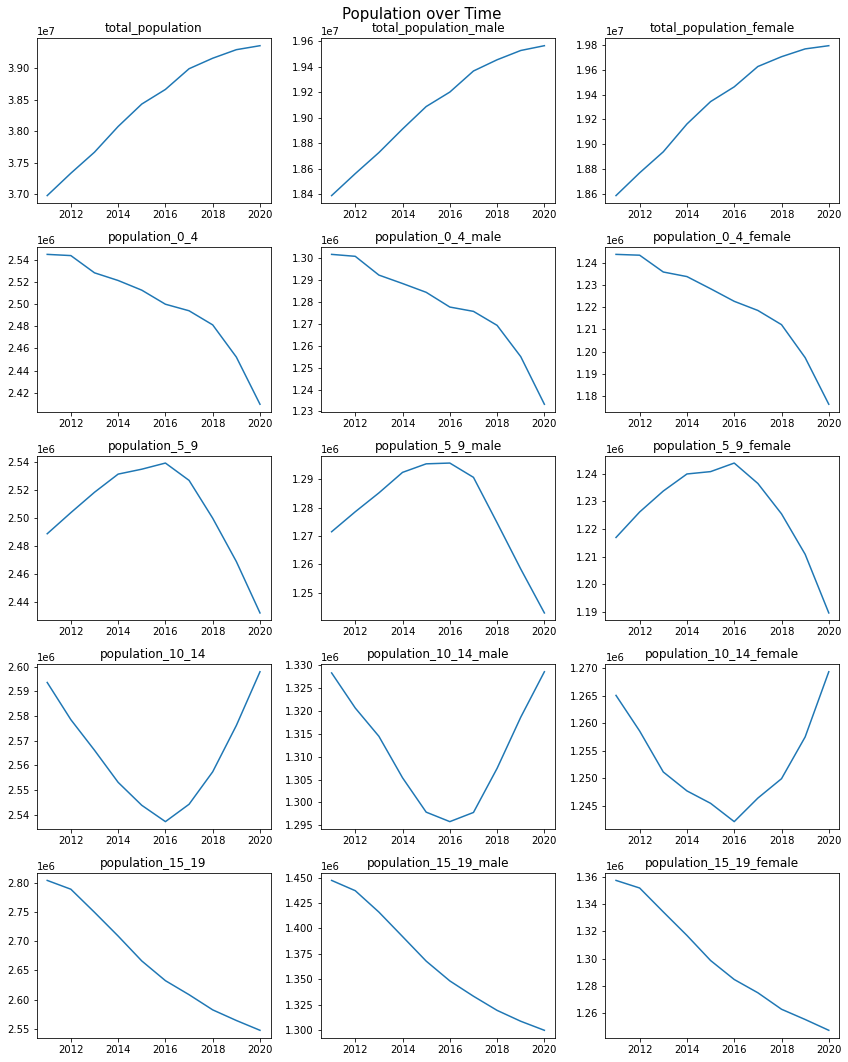

In [167]:
# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df_grouped
all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print("")

Histogram of ages

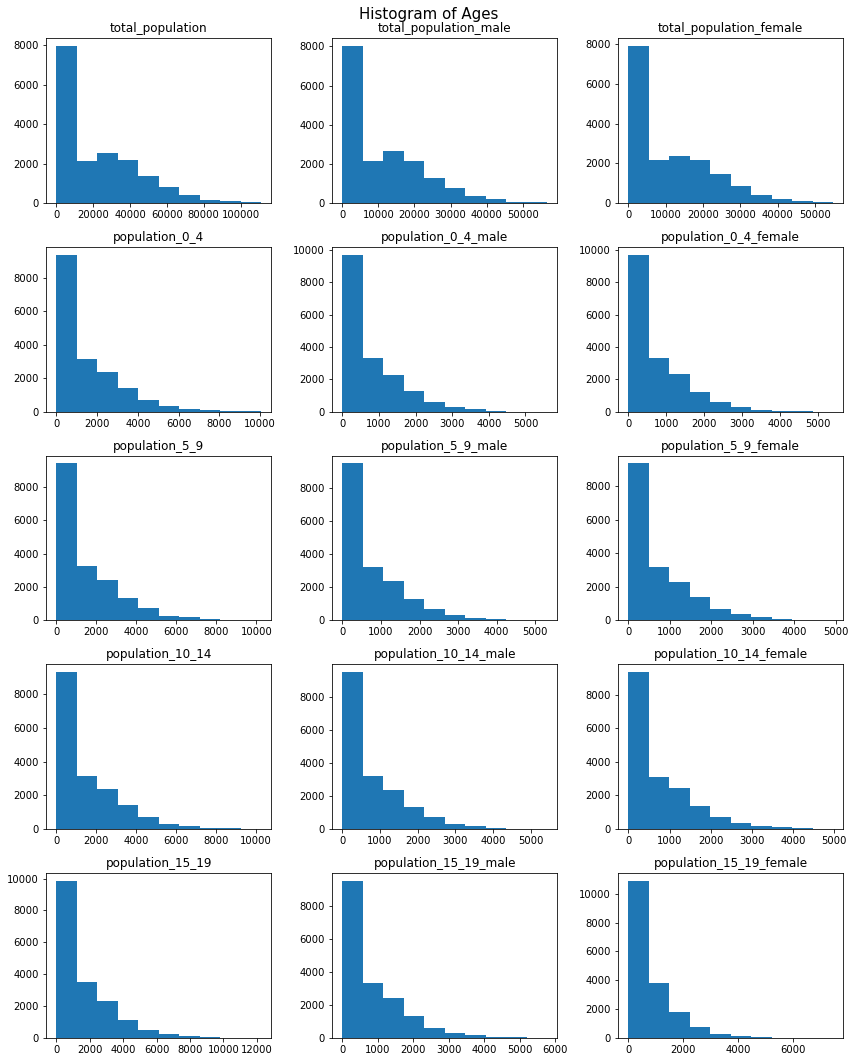

In [182]:
# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df[df.columns[2:]]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = df_plt.columns[col_i]
    ax[i][j].hist(df_plt[var])
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Histogram of Ages".format(col_i), size=15)
fig.tight_layout()
print("")

See min/max zip codes to filter future queries to get only CA zips. Using this in my GCP query to reduce zip code count a bit. 

In [169]:
print(df['zip'].min())
print(df['zip'].max())

89010
97635


## Step 2: Read in decennial census which was downloaded from GCP

In [171]:
df2 = pd.read_csv('../gcp_data/gcp_census_bureau_decenial.csv')
df2

,zipcode,year,minimum_age,maximum_age,gender,population
0,89011,2010,0,4,male,757
1,89012,2010,0,4,male,830
2,89013,2010,0,4,male,4
3,89014,2010,0,4,male,1121
4,89015,2010,0,4,male,1354
...,...,...,...,...,...,...
64645,95004,2000,18,19,female,42
64646,99579,2000,18,19,female,2
64647,98439,2000,18,19,female,146
64648,99563,2000,18,19,female,10


Clean it up to align w/ format above

In [172]:
# 63 distinct zips are 3-digit zips
# not sure how to deal, probably have to just filter out
df2[df2['zipcode'].str.count('XX')>0]['zipcode'].value_counts()

997XX    10
939XX    10
977XX    10
934XX    10
990XX    10
         ..
893XX    10
931XX    10
959XX    10
923XX    10
894XX    10
Name: zipcode, Length: 63, dtype: int64

Remove three digit zips, and create age band field.

In [173]:
df2 = df2[df2['zipcode'].str.count('XX')==0]
df2['zipcode'] = df2['zipcode'].astype(int)
df2['age_band'] = df2.apply(lambda df:  'population_' + str(df['minimum_age']) + '_' + str(df['maximum_age']) + '_' + df['gender'], axis=1)
df2

,zipcode,year,minimum_age,maximum_age,gender,population,age_band
0,89011,2010,0,4,male,757,population_0_4_male
1,89012,2010,0,4,male,830,population_0_4_male
2,89013,2010,0,4,male,4,population_0_4_male
3,89014,2010,0,4,male,1121,population_0_4_male
4,89015,2010,0,4,male,1354,population_0_4_male
...,...,...,...,...,...,...,...
64645,95004,2000,18,19,female,42,population_18_19_female
64646,99579,2000,18,19,female,2,population_18_19_female
64647,98439,2000,18,19,female,146,population_18_19_female
64648,99563,2000,18,19,female,10,population_18_19_female


cast out the columns

In [174]:
df2 = df2.pivot(
  index = ['zipcode', 'year'], 
  columns = ['age_band'], 
  values = 'population'
).reset_index()
df2 

age_band,zipcode,year,population_0_4_female,population_0_4_male,population_10_14_female,population_10_14_male,population_15_17_female,population_15_17_male,population_18_19_female,population_18_19_male,population_5_9_female,population_5_9_male
0,89001,2000,33,31,45,50,27,36,13,17,30,39
1,89003,2000,36,40,35,51,22,28,13,12,49,42
2,89004,2000,5,8,7,10,7,4,2,3,7,7
3,89005,2000,271,305,512,533,292,324,152,149,409,408
4,89007,2000,48,43,60,71,37,41,26,19,69,56
...,...,...,...,...,...,...,...,...,...,...,...,...
6397,99927,2000,2,4,4,8,3,3,1,2,6,2
6398,99927,2010,0,1,0,3,3,0,3,2,1,0
6399,99929,2000,67,81,110,131,65,64,16,25,87,93
6400,99929,2010,69,60,71,83,43,57,23,29,69,64


Spot check a few zip codes to see if populations are similar. 

In [183]:
df[df.zip == 94123]

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19
988,2011,94123,22350.0,10030.0,12320.0,961.050,391.170,554.400,581.100,270.810,308.000,223.500,80.240,135.520,111.750,100.300,24.640,1877.400
2757,2012,94123,23710.0,10763.0,12947.0,1161.790,559.676,595.562,735.010,290.601,440.198,403.070,204.497,207.152,213.390,107.630,103.576,2513.260
4526,2013,94123,24500.0,11507.0,12993.0,1225.000,678.913,545.706,784.000,333.703,454.755,441.000,230.140,220.881,294.000,218.633,77.958,2744.000
6295,2014,94123,25528.0,12173.0,13355.0,1276.400,706.034,574.265,842.424,292.152,547.555,561.616,328.671,240.390,459.504,267.806,186.970,3139.944
8064,2015,94123,25273.0,11798.0,13475.0,1288.923,707.880,579.425,884.555,318.546,565.950,480.187,271.354,202.125,379.095,224.162,148.225,3032.760
9833,2016,94123,25238.0,12312.0,12926.0,1287.138,726.408,555.818,782.378,320.112,465.336,555.236,283.176,271.446,429.046,233.928,193.890,3053.798
11602,2017,94123,25461.0,12338.0,13123.0,1311.000,696.000,615.000,721.000,375.000,346.000,485.000,177.000,308.000,425.000,270.000,155.000,2942.000
13371,2018,94123,25941.0,12409.0,13532.0,1323.000,767.000,556.000,685.000,392.000,293.000,634.000,209.000,425.000,308.000,131.000,177.000,2950.000
15140,2019,94123,25890.0,12536.0,13354.0,1166.000,614.000,552.000,563.000,344.000,219.000,685.000,254.000,431.000,374.000,201.000,173.000,2788.000
16909,2020,94123,26074.0,12336.0,13738.0,1800.000,949.000,851.000,577.000,353.000,224.000,683.000,305.000,378.000,448.000,260.000,188.000,3508.000


In [184]:
df2[df2.zipcode == 94123]

age_band,zipcode,year,population_0_4_female,population_0_4_male,population_10_14_female,population_10_14_male,population_15_17_female,population_15_17_male,population_18_19_female,population_18_19_male,population_5_9_female,population_5_9_male
2231,94123,2000,361,340,156,150,88,85,47,36,179,175
2232,94123,2010,547,494,181,162,92,77,49,48,268,298


Next steps:
- in df2, combine 15-17 and 18-19 age bands into 1
- in df2, linear interpolate between ages to estimate populations for in-between years
- join df and df2 together
- write to disk 

### Write file to disk

In [5]:
# out_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/population/ACS/clean_census_bureau'
# df.to_csv(os.path.join(out_path, 'census_bureau.csv'), index=False)